In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def fill_copies(dframe,column):
    copies = int(dframe.loc[dframe[column] == '-', column].count())
    for i in range(0,copies):
        dframe.loc[dframe[column] == '-', column] = dframe[column].shift(1)
    return dframe

# file = '20240916.csv'
path = f'Z:\Raw\Graduate Assistantship/timesheet/timestamps'
df = pd.read_csv(path) 
df = fill_copies(df,'date')
df = fill_copies(df,'advisor')
df.loc['Total'] = df.sum()
# df['date'].iloc[-1] = df['date'].iloc[-2]
df.loc[df.index[-1],'date'] = df.loc[df.index[-2],'date']
df['hours_worked'] = df['hours'] + df['minutes']/60 + df['seconds']/3600
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day_name()
# df['day'][-1] = 'Total'
df.loc[df.index[-1],'day'] = 'Total'
df.loc[df.index[-1],'advisor'] = ''
print(df)
hours_mike = df[df['advisor'] == 'Michael']['hours_worked'].sum()
hours_rajiv = df[df['advisor'] == 'Rajiv']['hours_worked'].sum()
print('Mke: ' + str(hours_mike))
print('Rajiv: ' + str(hours_rajiv))

            date  advisor  hours  minutes  seconds  hours_worked        day
0     2024-09-16    Rajiv      1        0        0      1.000000     Monday
1     2024-09-16       IS      0       26       51      0.447500     Monday
2     2024-09-16    Rajiv      1       32       34      1.542778     Monday
3     2024-09-17    Rajiv      1        0        0      1.000000    Tuesday
4     2024-09-17  Michael      1       16       40      1.277778    Tuesday
5     2024-09-17  Michael      1       30        1      1.500278    Tuesday
6     2024-09-18  Michael      1       36       47      1.613056  Wednesday
7     2024-09-18  Michael      0       29       35      0.493056  Wednesday
8     2024-09-18    Rajiv      0        5        0      0.083333  Wednesday
9     2024-09-19    Rajiv      0       21       19      0.355278   Thursday
10    2024-09-19    Rajiv      0       25       14      0.420556   Thursday
11    2024-09-19    split      0        8        5      0.134722   Thursday
12    2024-0

In [9]:
hours = []
for advisor in df['advisor'].unique()[:-1]:
    hours = df[df['advisor'] == advisor]['hours_worked'].sum()
    print(advisor + ': ' + str(round(hours,2)))
    
# hours_rajiv = df[df['advisor'] == 'Rajiv']['hours_worked'].sum()
# print('Mke: ' + str(hours_mike))
# print('Rajiv: ' + str(hours_rajiv))

Rajiv: 6.42
IS: 0.45
Michael: 4.88
split: 0.13


In [6]:
df['advisor'].unique()[:-1]

array(['Rajiv', 'IS', 'Michael', 'split'], dtype=object)

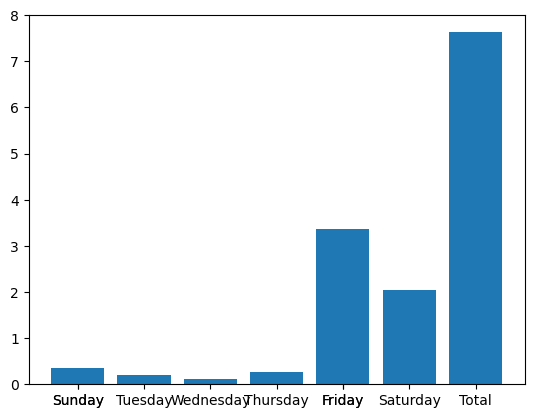

In [95]:
# fig, ax = plt.subplots()
# ax.plot(df['day'],df['hours_worked'])
# ax.set_xticklabels(df['day'])

# df[['day','hours_worked']].plot(kind='bar')

plt.bar(df['day'],df['hours_worked'])
plt.xticks(df['day'])
plt.show()


In [96]:
plt.savefig('hours.jpg')

<Figure size 640x480 with 0 Axes>

In [97]:
import os
os.getcwd()

'Z:\\Raw'